In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [2]:
X, y = make_regression(n_features=1)

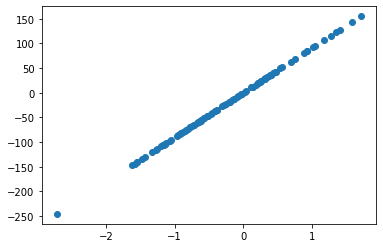

In [3]:
plt.scatter(X, y)

- as above their is no noise it gives out a straight line
- bias is used to give the value of y axis on 0 at x axis

In [4]:
X, y = make_regression(n_features=1, noise=15, bias=100, random_state=20)

- random_state above fix the random value generator as the random value generate on the basis of random_state value

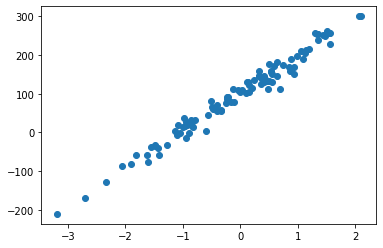

In [5]:
plt.figure()
plt.scatter(X, y)
plt.show()

In [6]:
X.shape

(100, 1)

In [7]:
y.shape

(100,)

In [8]:
model = LinearRegression()

In [9]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.intercept_

101.71847294268703

In [11]:
model.coef_

array([96.24528642])

In [12]:
yp = model.predict(X)

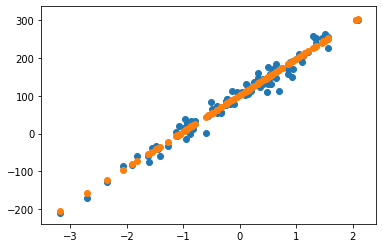

In [13]:
plt.scatter(X, y)
plt.scatter(X, yp)

In [14]:
X, y = make_regression(n_features=1, noise=15, bias=100, random_state=20)

In [15]:
class CustomLinearReg:
    def __init__(self, lr=.01, iters=300):
        self.lr = lr
        self.iters = iters
    
    def fit(self, X, y):
        self.coef_ = np.random.randn(X.shape[1] , 1) #use the shape for getting no of columns
        self.bias_ = np.random.random()
        
        error = []
        for i in range(self.iters):
            errors =  self.gradient_decend(X, y)
            error.append(errors)
            
        return error
    
    def gradient_decend(self, X, y):
        delta_coef, delta_bias, error = self.gradient(X, y)
        self.coef_ += delta_coef
        self.bias_ += delta_bias
        return error
    
    def gradient(self, X, y):
        yh = self.hypo(X)
        error = np.mean((yh-y)**2)
        dmsedm = np.mean(2*(yh-y)*X)
        dmsedm1 = np.mean(2*(yh-y))
        return -dmsedm*self.lr, dmsedm1*self.lr, error
        
    def hypo(self, X):
        return np.dot(X, self.coef_) + self.bias_
